## time in action

In [27]:
from time import time, sleep

curr = time()
sleep(2)

print(time() - curr)

2.0026822090148926


## datetime in action

In [43]:
from datetime import datetime

now = datetime.now()
print('now: ', now)
print('hour-minute-second: ', f"{now.hour}-{now.minute}-{now.second}")
print('HH:MM:SS: ', now.strftime("%H:%M:%S"))
print('day-month-year: ', f"{now.day}-{now.month}-{now.year}")
print('DD.MM.YYYY: ', now.strftime("%d.%m.%Y"))

now:  2020-11-29 10:49:26.205679
hour-minute-second:  10-49-26
HH:MM:SS:  10:49:26
day-month-year:  29-11-2020
DD.MM.YYYY:  29.11.2020


## Lists in action

In [16]:
l = ['caribbean', 'maldives', 'canaries', 'bornholm']
print('original: ', l)
print('reversed: ', list(reversed(l)))
print('sorted: ', sorted(l))
print('enumerated: ', end="")
for k, v in enumerate(l):
    print(f"{k} - {v}, ", end="")

original:  ['caribbean', 'maldives', 'canaries', 'bornholm']
reversed:  ['bornholm', 'canaries', 'maldives', 'caribbean']
sorted:  ['bornholm', 'canaries', 'caribbean', 'maldives']
enumerated: 0 - caribbean, 1 - maldives, 2 - canaries, 3 - bornholm, 

## List comprehension

In [17]:
tuples = [(k,v) for k,v in enumerate(l)]
print('list comprehension result:', tuples)

list comprehension result: [(0, 'caribbean'), (1, 'maldives'), (2, 'canaries'), (3, 'bornholm')]


## matplot in action

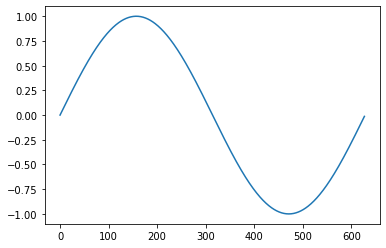

In [44]:
# needed first: pip install matplotlib
import matplotlib.pyplot as plt
import math

x = range(0, int(2* math.pi * 100), 1) # 0..2*PI
y = [math.sin(x/100) for x in x]
plt.plot(x,y)
plt.show()

## files 

In [30]:
with open("/proc/cpuinfo", "r") as f:
    lines = f.readlines()
    print("".join(lines))

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 142
model name	: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz
stepping	: 10
microcode	: 0xe0
cpu MHz		: 2776.186
cache size	: 8192 KB
physical id	: 0
siblings	: 8
core id		: 0
cpu cores	: 4
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 22
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf pni pclmulqdq dtes64 monitor ds_cpl vmx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault epb invpcid_single pti ssbd ibrs ibpb stibp tpr_shadow vnmi flexpriority ept vpid ept_ad fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid mpx rdseed adx smap clflushopt intel_pt xsaveopt xsavec xgetbv1 xsaves

## os

In [112]:
import os

dir_entries = os.listdir("/boot")
print("All under /boot:")
print("\n".join(dir_entries))

# check if path points to file
# file = os.path.isfile("/home/user/.bashrc")

# check if path points to dir
# dir = os.path.isdir("/home/user/.bashrc")

# other operations:
#  os.mkdir("/tmp/test")
#  os.rename("/tmp/test", "/tmp/experiment")
#  os.rmdir("/tmp/experiment")

All under /boot:
initramfs-5.8-x86_64-fallback.img
efi
linux59-x86_64.kver
grub
vmlinuz-5.9-x86_64
linux58-x86_64.kver
initramfs-5.8-x86_64.img
amd-ucode.img
initramfs-5.7-x86_64-fallback.img
initramfs-5.9-x86_64.img
vmlinuz-5.8-x86_64
initramfs-5.9-x86_64-fallback.img
memtest86+
initramfs-5.7-x86_64.img
linux57-x86_64.kver
vmlinuz-5.7-x86_64


## magic methods

In [122]:
class Demo(object):
    def __init__(self):
        print("create")
    def __str__(self):
        return "Demo object"
    def __int__(self):
        return 33
    def __bool__(self):
        return True
    def __del__(self):
        print("destroy")

d = Demo()
print(d)
print(int(d))
print(bool(d))
del d

create
Demo object
33
True
destroy


## inheritance

In [13]:
def override(f):
    """ just a marker decorator """
    return f

class Speaker(object):
    def __init__(self):
        pass
    
    def hello(self):
        print("hello")
        
    def small_talk(self):
        print("this morning was cold, wasn't it?")
        
    def bye(self):
        print("goodbye")
        
class LouderSpeaker(Speaker):
    @override
    def __init__(self):
        super(LouderSpeaker, self).__init__()
        
    @override
    def hello(self):
        print("HELLO")
        
    @override
    def bye(self):
        print("GODBYE")  
        
 

l = LouderSpeaker()
l.hello()
l.small_talk()
l.bye()

HELLO
this morning was cold, wasn't it?
GODBYE


## decorators

In [1]:
def red(f):
    def wrapper(*args, **kwargs):
        print('\033[31m')
        return f(*args, **kwargs)
    return wrapper
 
def blue(f):
    def wrapper(*args, **kwargs):
        print('\033[34m')
        return f(*args, **kwargs)
    return wrapper

class Speaker(object):
    @red
    def hello(self):
        print("hello")
        
    @blue
    def bye(self):
        print("goodbye")

s = Speaker()
s.hello()
s.bye()


hello

goodbye


## requests

In [29]:
import requests

last_usd_price_url = "http://api.nbp.pl/api/exchangerates/rates/A/USD/last/1" # table 'A' = average price
headers = {'Accept': 'application/json'} # also available: xml
response = requests.get(last_usd_price_url, headers=headers)

print(response.text)

{"table":"A","currency":"dolar amerykański","code":"USD","rates":[{"no":"232/A/NBP/2020","effectiveDate":"2020-11-27","mid":3.7614}]}


## Input in action

In [5]:
x = input('Say something: ')
print('You inputted: ',x )

Say something: sialala
You inputted:  sialala
